# The Analysis Pipeline
At the core of programming for data science we have the following pipeline:


![pipeline.png](assets/pipeline.png)

# Import and Explore - CSV Files
Perhaps the simplest data source is the Comma Separated Value (CSV) file:

```
outlook,temp,humidity,windy,play
sunny,hot,high,false,no
sunny,hot,high,true,no
overcast,hot,high,false,yes
rainy,mild,high,false,yes
rainy,cool,normal,false,yes
rainy,cool,normal,true,no
overcast,cool,normal,true,yes
sunny,mild,high,false,no
sunny,cool,normal,false,yes
rainy,mild,normal,false,yes
sunny,mild,normal,true,yes
overcast,mild,high,true,yes
overcast,hot,normal,false,yes
rainy,mild,high,true,no
```
**Header row**, column names comma separated.
Then **one row for each observation**, attribute values are comma separated.

This is the 'tennis.csv' file.


# Import and Explore - CSV Files
Pandas has support for reading and writing CSV files...


In [1]:
import pandas

In [2]:
tennis_df = pandas.read_csv("assets/tennis.csv")

In [3]:
tennis_df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


### More Detailed Analysis of the Frame

A quick peek at the first 5 rows of the frame

In [4]:
tennis_df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [5]:
tennis_df.shape 

(14, 5)

In [6]:
tennis_df.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

All our attribute values are labels or in statistical jargon - our columns represent **categorical variables**.


In [7]:
tennis_df['play'].value_counts()

yes    9
no     5
Name: play, dtype: int64

'Yes' is the *majority* label so we would expect the mode to be 'yes'...

In [8]:
tennis_df['play'].mode() # this should display 'yes' as the mode

0    yes
dtype: object

In Pandas columns can be interpreted as object data members!

In [9]:
tennis_df.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

# Import and Explore - Visualization

We will use the `Matplotlib` library for our visualization.

Using the Notebook magic command `%matplotlib inline` instead of this:
```
import matplotlib.pyplot as plot
...
plot.show()
```

In [10]:
%matplotlib inline

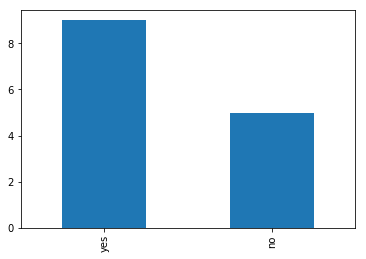

In [11]:
tennis_df['play'].value_counts().plot(kind='bar')

Let's try something fancy buy plotting all columns at the same time!

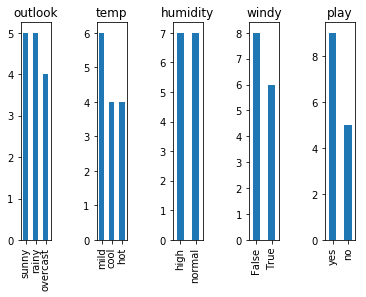

In [12]:
import matplotlib.pyplot as plot
for i in range(1,6):
    plot.subplot(1,5,i)
    plot.title(tennis_df.columns[i-1])
    plot.subplots_adjust(wspace=1.5, hspace=0.5)
    tennis_df.iloc[:,i-1].value_counts().plot(kind='bar')


# Visualizing the Iris Data Set

Let’s try another data set that has a mix of categorical and numeric attributes:
* The *Iris* data set
* One of the most famous data sets in statistics/data science
* Describes three species of iris


In [13]:
iris = pandas.read_csv('assets/iris.csv')

In [14]:
iris.shape

(150, 6)

In [15]:
iris.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


We have a mix of numeric and categorical attributes, get some descriptive statistics.


In [16]:
iris.describe()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Describe function only applies to numeric attributes!


We can also plot a histogram for each of the numeric attributes.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bd47940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c01ff60>]], dtype=object)

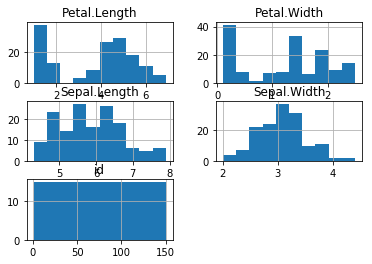

In [17]:
iris.hist()

* Histograms reveal the distribution of values.  
* Petal.Length and Petal.Width are multi-modal (more than one peak)
* Sepal.Length and Sepal.Width are more or less normally distributed.


# Distributions


<img src="http://www.statisticshowto.com/wp-content/uploads/2013/07/bimodal-distribution-2.jpg" height="350" width="400">

A multimodal distribution is a probability distribution with more than one peak, or “mode.”

* A distribution with one peak is called unimodal
* A distribution with two peaks is called bimodal
* A distribution with two peaks or more is multimodal

A bimodal distribution is also multimodal, as there are multiple peaks.

(source: http://www.statisticshowto.com/multimodal-distribution/)

# The Normal Distribution


<img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG"  height="350" width="400">


For the **normal distribution**, the values less than one standard deviation away from the mean account for 68.27% of the set; while two standard deviations from the mean account for 95.45%; and three standard deviations account for 99.73%. (Wikipedia)


We have to look at the categorical attribute of the Iris data set separately.


In [18]:
iris.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [19]:
iris['Species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

In [20]:
iris['Species'].mode()

0        setosa
1    versicolor
2     virginica
dtype: object

All labels are equally represented -- the mode is all three labels!

# Transform

* The `id` column in the iris dataset does not add any information.  
* It assigns a unique number to each row of the table.
* We want to just drop this column from our dataset


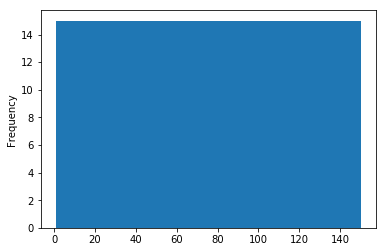

In [21]:
iris['id'].plot('hist')

We use the drop function to drop the ‘id’ column.


In [22]:
iris.shape

(150, 6)

In [23]:
iris_new = iris.drop('id',axis=1)

In [24]:
iris_new.shape

(150, 5)

In [25]:
iris_new.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Looking at the *independent* variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c36ce80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bccd5f8>]], dtype=object)

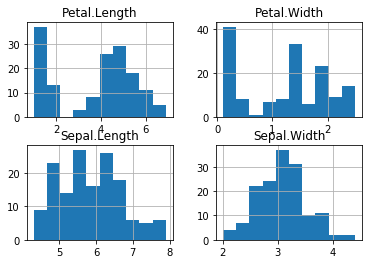

In [26]:
iris_new.hist()

![cheat sheet](assets/PandasPythonForDataScience.pdf)

<a href="http://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience+(1).pdf">source</a>

# Reading

* [2.1 Understanding Data Types in Python](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)
* [3.0 Data Manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)
* [3.1 Introducing Pandas Objects](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html)
* [4.0 Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* [4.2 Simple Scatter Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)


# Team Project

Find 2 different data sets and compute summary statistics.

For each data set try to answer the following questions:
* How many columns are there?
* How many rows are there?
* Are the columns numerical, categorical, or both?
* Are there columns that provide no information? Just constant values for all observations.
* For each categorical columns compute the mode.
* For each numerical column compute the mean (average), max, and min values.
* Plot histograms for numerical columns.
* Plot bar plots for categorical columns.

More details on assignment in Sakai. See [course webpage](https://homepage.cs.uri.edu/faculty/hamel/courses/home/csc310/) for links to data set collections.

# Teams

```
Team 1:  Cole, Patrick M, Jared P, 
Team 2:  Shannon Patrice, John Francis, Timothy Terence, 
Team 3:  Camren Joseph, Giulia, Julio, 
Team 4:  Jake Adam, Emmely, Dan Steven, 
Team 5:  Sofia R, Stephanie, Michael Russell, 
Team 6:  Luca G, Jaeke R, Evan Jonathan, 
Team 7:  William Jordan, Joey, Phidias, 
Team 8:  Yeury, Kenney A, Korakot, 
Team 9:  Tony Levada, Andrew Michael, Hennjer, 
Team 10:  Ryan Richard, , Zachary T, 
Team 11:  C.J., Timothy, Joshua Patrick, 
Team 12:  Samantha N, Joshua D, Cody Rithysan, 
```